<a href="https://colab.research.google.com/github/slover1126/slover1126/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2장 머신러닝 프로젝트 처음부터 끝까지**

**파이프라인**


*   데이터 처리 컴포넌트(수집, 전처리, 시각화 등) 이 모여있는 것을 파이프라인 이라고 함
*   한 컴포넌트의 작업이 중단되더라도 이전 과정으로 부터 들어온 결과물로 작업을 이어나갈 수 있음


**2.2.2 성능 측정 지표 선택**


*   회귀 문제의 경우 **평균 제곱근 오차 (RMSE)**를 성능 지표로 사용
*  RMSE는 다음과 같이 계산됨

$$\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\mathbf{x}^{(i)}) - y^{(i)} \right)^2}
$$



*   m = 관측치 수.xi = i번째 관측치의 독립변수들의 값(다중회귀의 경우 벡터), h(xi) = i번째 관측치의 예측값, yi = i번째 관측치의 실제 종속변수 값
*   통계학에서의 MSE와는 다르게 자유도가 아닌 전체 데이터 값으로 나눠줌
*   통계학은 모분산의 추정을 위한 것이고 머신러닝에서는 모델의 성능을 평가하기 위함이라 이런 차이가 발생함


*  이상치가 많다면 **평균 절대 오차(MAE)** 를 사용할수도 있음
*  MAE는 다음과 같이 계산됨
 $$
\text{MAE}(\mathbf{X}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|
$$



*   RMSE의 경우는 유클리드 norm을 사용하여 거리를 측정
*   MAE의 경우는 맨해튼 norm을 사용하여 거리를 측정




In [ ]:
#맷플롯립 userwarning 없애기

In [15]:
# 1. 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [16]:
import matplotlib.pyplot as plt

# 3. 맷플롯립 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 4. 마이너스 기호 깨짐 방지 (한글 폰트 쓰면 마이너스가 네모로 깨질 수 있음)
plt.rc('axes', unicode_minus=False)

In [1]:
#2.3.5 데이터 다운로드
from pathlib import Path #파일 경로를 다루는 라이브러리
import pandas as pd #데이터 전처리 라이브러리
import tarfile #압축 파일을 쓸수 있게하는 라이브러리
import urllib.request #웹 요청 및 다운로드 도구

def load_housing_data():
    tarball_path =  Path("datasets/housing.tgz") #Path:주소를 운영체제에 맞게 바꿔주는 함수
    if not tarball_path.is_file(): #파일이 없다면 실행
        Path("datasets").mkdir(parents = True, exist_ok = True) #datasets 폴더 만들고 있다면 사용(exist_ok = True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path) #urllib.request.urlretrieve(A,B) :A에 있는 파일을 B에 저장하는 코드
    with tarfile.open(tarball_path) as housing_tarball: #다운받은 파일 열기
        housing_tarball.extractall(path="datasets")  #datasets 안에 전부 풀어두기
    return pd.read_csv("datasets/housing/housing.csv")
housing = load_housing_data()
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

/tmp/ipython-input-89940628.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")  #datasets 안에 전부 풀어두기


In [2]:
#2.3.6 데이터 구조 훑어보기
housing.head() #.head() 함수는 dataframe의 상위 5개 행을 보여줌
# longitude, latitude,housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity 변수들로 구성됨을 알수있음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info() #.info() 함수는 dataframe의 정보들을 요약하여 보여줌
#dataframe 자료형이고, 전체 20640개의 관측치가 있으며 10개의 열변수로 구성됨, total_bedrooms의 경우 20433개만 null값이 아니므로 결측치가 존재함을 확인, ocean_proximity의 경우 범주형 자료임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts() #변수명.["열변수명"].value_counts() 는 열변수에 있는 값들을 카운트해서 보여줌(범주형 요약에 편함)

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
housing.describe() #.describe() 함수는 요약 통계량(평균, 표준편차, 최대최소값, 중간값, 1,3사분위수)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


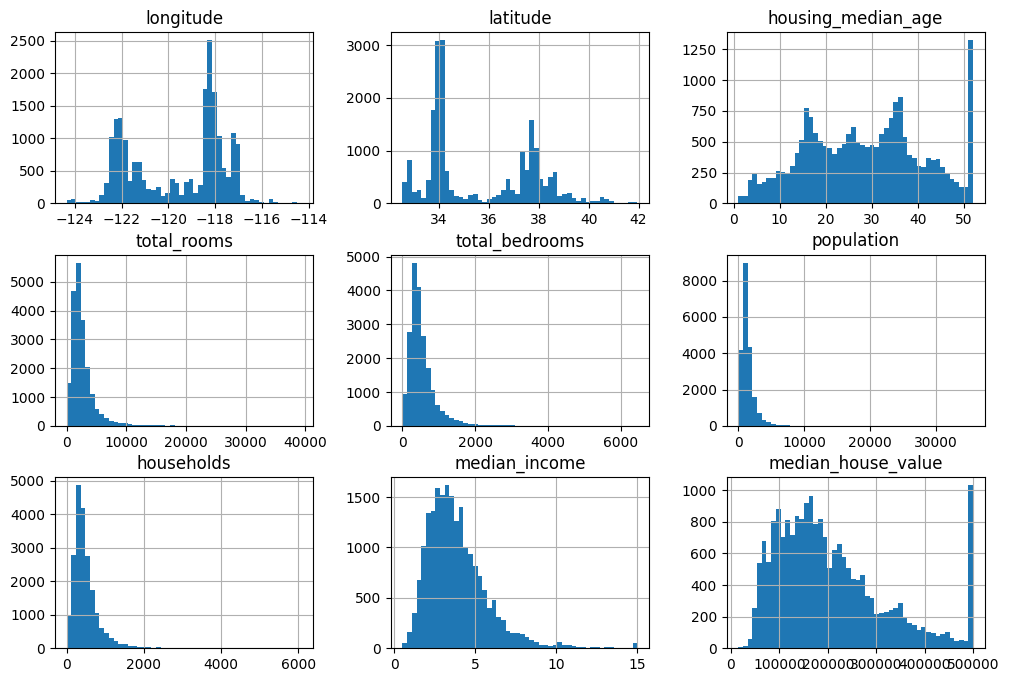

In [6]:
import matplotlib.pyplot as plt #시각화 라이브러리
housing.hist(bins=50, figsize =(12,8)) #bins 옵션: x축을 몇등분 할 건지 설정, figsize =(가로,세로)옵션 : 그래프의 배경 크기 설정
plt.show() #시각화

**2.3.7 테스트 세트 만들기**

*   전체 데이터를 본 후 모델링을 시행하면, 인간의 뇌가 편향된 생각을 할 수 있음(당연히 이 모델이 잘 맞겠지 하는)
*  그러나 이 경우 모델의 잘못된 선택과 적합이 이루어질 수 있음
* 이를 **데이터 스누핑** 편향이라고 함




In [7]:
#테스트 세트 만들기
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #데이터 길이만큼의 숫자의 리스트가 무작위로 섞임(각 숫자는 관측치에 할당함)
    test_set_size = int(len(data) * test_ratio) #테스트 사이즈의 크기(전체 데이터 길이* 테스트 세트로 놓을 비율)
    test_indices = shuffled_indices[:test_set_size] #테스트 데이터의 인덱스는 앞에서부터 테스트 세트의 사이즈 만큼을 슬라이싱
    train_indices = shuffled_indices[test_set_size:] #훈련 데이터는 나머지
    return data.iloc[train_indices], data.iloc[test_indices] # .iloc[] 함수를 이용해 숫자를 데이터의 행으로 반환

#사용(예시)

train_set, test_set = shuffle_and_split_data(housing, 0.2)
#print(train_set) 훈련 데이터로 할당된 데이터 출력
#print(test_set) 테스트 데이터로 할당된 데이터 출력
print(len(train_set),len(test_set)) #훈련,테스트 데이터 사이즈 출력

16512 4128


난수의 초기값을 지정하여 혼련/테스트 데이터셋을 나누는 방법은 데이터의 업데이트 이후 새롭게 데이터셋을 나눌 때 기존의 테스트 데이터셋이 훈련데이터로 섞일수도 있다는 문제가 존재함 ->어떤 데이터로 학습을 진행했는지가 달라지기 때문에 성능 측정이 정확하지 않을 수 있음

따라서 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트로 보내는 방법을 사용

In [8]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio *2**32  #crc32(np.int64(identifier)) ->identifier 인자를 넣으면 고유 정수를 출력함/ test_ratio *2**32->해시 최댓값이 2^32개인데 이 중 테스트 비율만큼 커트라인

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column] #df에서 id_column인 열만 지
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio)) #ids.apply() ->괄호 안 함수를 ids의 요소들에 대해 실행/ lambda 구문->테스트 데이터셋에 포함되는지 T/F 여부가 리스트로 나옴
    return data.loc[~in_test_set], data.loc[in_test_set] #테스트 세트가 아닌애들(훈련세트), 테스트 세트인 애들 반환


In [9]:
#주택 데이터는 식별자 칼럼이 없어 행의 인덱스를 id로 사용

housing_with_id = housing.reset_index() #행에 대한 인덱스 열을 추가시킴
#print(housing_with_id)
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
#print(train_set, test_set)

housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(train_set, test_set)


       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
6          6    -122.25     37.84                52.0       2535.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401

In [10]:
#사이킷런의 함수
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size =0.2, random_state=42)

#train_test_split(데이터셋, test_size = 테스트 세트 비율, random_state= 난수 시드 고정)
# x_train, x_test, y_train, y_test = train_test_split(x값, y값, test_size = 테스트 세트 비율, random_state= 난수 시드 고정)으로도 사용이 가능함(x,y값을 따로 데이터로 가지고 있는 경우 사용)

**샘플링**


*   단순하게 무작위 샘플링이 아니라 전체 모집단의 비율이 잘 반영되도록 샘플링 하여야 함
*   예를 들어 한 국가의 남녀 성비가 4:6이라면, 1000명을 샘플로 뽑을 경우 남자 400명, 여자 600명을 표본으로 삼는 것이 합리적임
* 이처럼 비율로 샘플링 하는 것을 **계층적 샘플링** 이라고 함



<function matplotlib.pyplot.show(close=None, block=None)>

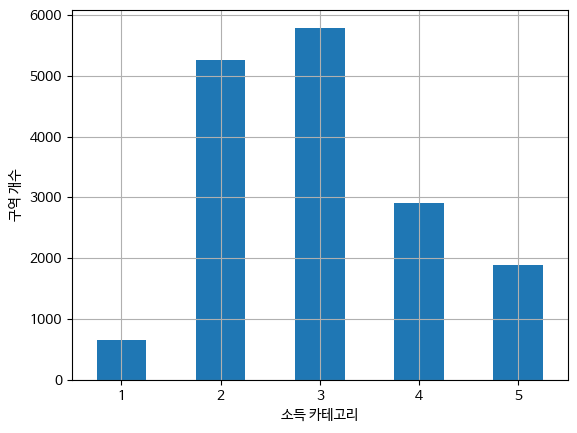

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
#pd.cut(자를 대상, bins=구간(np.inf 옵션은 마지막 구간보다 얼마나 크더라도 다 마지막 인덱스로 포함시키기), labels=인덱스)

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter= StratifiedShuffleSplit(n_splits = 10, test_size=0.2, random_state=42) #StratifiedShuffleSplit(n_splits = 나누는 시행을 몇 번 할건지, test_size=테스트 사이즈 비율, random_state=난수 고정값 ) ->계층 샘플링을 위한 함수
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]): # splitter.split(데이터셋, 기준열) ->기준열로 분
    strat_train_set_n = housing.iloc[train_index] #실제 행을 뽑아옴
    strat_test_set_n = housing.iloc[test_index] #실제 행을 뽑아옴
    strat_splits.append([strat_train_set_n, strat_test_set_n]) #빈 리스트에 저장
#print(strat_splits)

strat_train_set, strat_test_set = strat_splits[0]
strat_train_set, strat_test_set =train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42) #train_test_split()함수에서 stratify 옵션으로 분할 가능(1번의 시행만 하는 경우)

strat_test_set["income_cat"].value_counts()/len(strat_test_set) #테스트 셋에서의 비율 확인

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

**2.4 데이터 이해를 위한 탐색과 시각화**

In [13]:
housing = strat_train_set.copy() #훈련 데이터의 복사본 생성

**2.4.1 지리적 데이터 시각화 하기**

<function matplotlib.pyplot.show(close=None, block=None)>

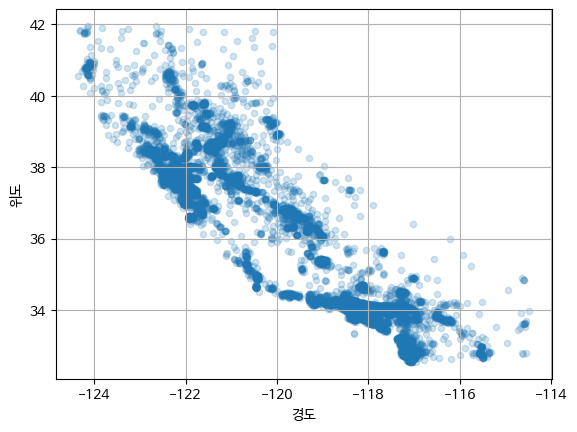

In [20]:
housing.plot(kind="scatter",x="longitude", y= "latitude", grid =True, alpha =0.2) #alpha 옵션->데이터가 밀집된 부분을 잘 보여줌
plt.xlabel("경도")
plt.ylabel("위도")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

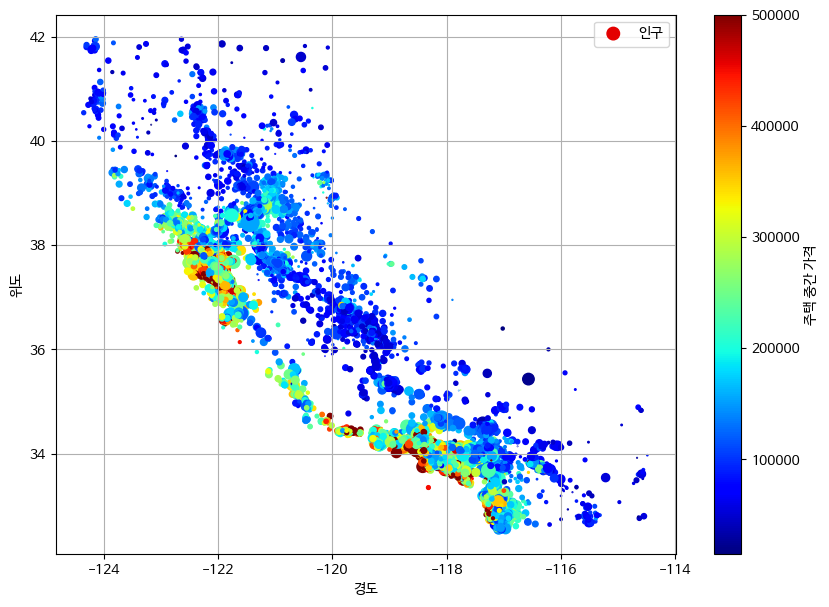

In [25]:
housing.plot(kind="scatter",x="longitude", y= "latitude", grid =True, s=housing["population"]/100, label="인구",c="median_house_value", cmap = "jet", colorbar=True, legend=True,figsize=(10,7))
# s=원 크기 지정/C=점 색 결정/cmap = "jet" 색상 범위
cax=plt.gcf().get_axes()[1] #컬러바 가져오기
cax.set_ylabel("주택 중간 가격") #컬러바 이름 지정
plt.xlabel("경도")
plt.ylabel("위도")
plt.show
#주택 가격이 높은 매물이 위도 38-경도 -122, 위도 34-경도 -117 근처에 많음을 알 수 있음

**2.4.2 상관관계 조사하기**

In [29]:
corr_matrix = housing.corr(numeric_only=True) #.corr()->변수간 상관계수 계산 numerics_only ->숫자만 출력
#print(corr_matrix)

corr_matrix["median_house_value"].sort_values(ascending=False) #"median_house_value"와 나머지 변수들 간 상관관계 출력

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


<function matplotlib.pyplot.show(close=None, block=None)>

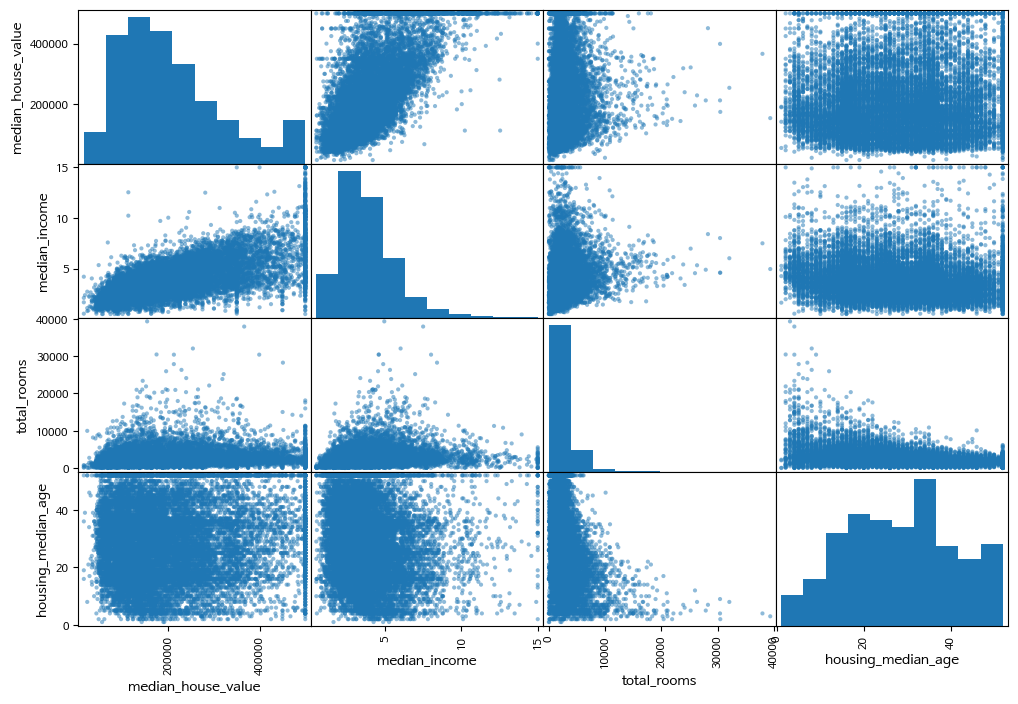

In [33]:
from pandas.plotting import scatter_matrix
attributes =["median_house_value","median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show
#히스토그램->같은 변수들끼리 산점도 행렬이 그려져야 할 때

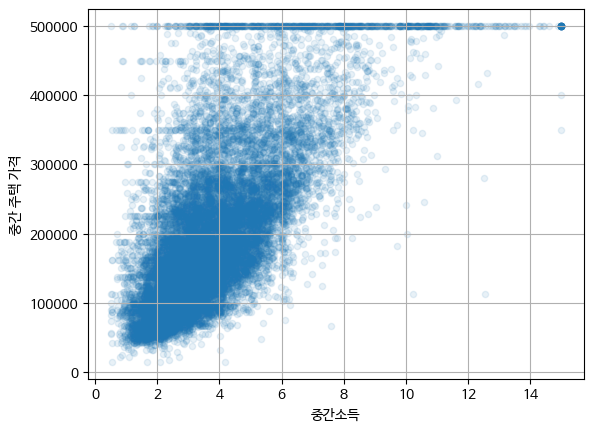

In [34]:
#주택 중간 가격&중위소득이 제일 선형관계가 잘 나타남
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.xlabel("중간소득")
plt.ylabel("중간 주택 가격")
plt.show()
#강한 양의 상관관계가 나타남